###**Naive Bayasian Classifier**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_excel(io.BytesIO(uploaded['banknote_auth_dataset.xlsx']))

Saving banknote_auth_dataset.xlsx to banknote_auth_dataset.xlsx


In [4]:
dataset

,Variance,Skewness,Kurtosis,Entropy,Authenticity
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
X = dataset.drop('Authenticity', axis = 1)
Y = dataset['Authenticity']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = GaussianNB().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [8]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
predicted_df

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
1342,1,1
251,0,0
1256,1,1
966,1,0


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[134  23]
 [ 23  95]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       157
           1       0.81      0.81      0.81       118

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275

0.8327272727272728


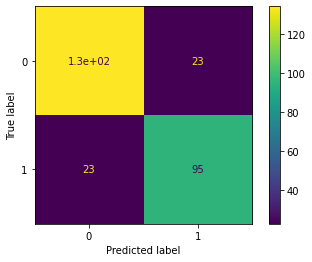

In [12]:
 plot_confusion_matrix(model, X_test, Y_test)
 plt.show()